In [56]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [15]:
# load load_breast_cancer
dat = sklearn.datasets.load_breast_cancer()
ix = np.where(dat["feature_names"] == "mean area")[0][0]
iy = np.where(dat["feature_names"] == "mean concave points")[0][0]

In [37]:
# normalize (use StandardScaler if you wish)
X0 = np.asarray([dat["data"][:,ix], dat["data"][:,iy], np.ones(dat["data"].shape[0])]).T
y0 = (1.*(dat["target"]==np.where(dat["target_names"] == "malignant")[0][0]) +
     -1.*(dat["target"]==np.where(dat["target_names"] == "benign")[0][0]))

X,y = X0.copy()[:,:-1], y0.copy() 

norm = StandardScaler()
norm.fit(X)

StandardScaler()

In [38]:
# partition with test size 0.3
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
# fit logistic regression and draw ROC curve
# use predict_log_proba()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve, f1_score
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

ns_probs =[0 for _ in range(len(y_test))]

#predict probabilities
lr_probs = log_reg.predict_log_proba(x_test)
lr_probs= lr_probs[:,1]
# use predict_log_proba()

#calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test,ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

In [40]:
clf = LogisticRegression(max_iter=1000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

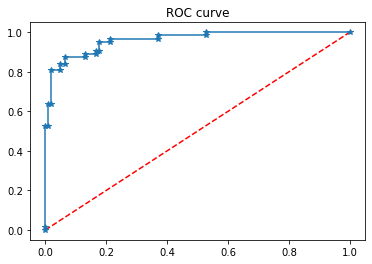

In [55]:
plt.title("ROC curve")
plt.plot(ns_fpr,ns_tpr,'r--')
plt.plot(lr_fpr,lr_tpr, marker='*')
plt.show()

In [52]:
# What happens to the mean accuracy on the given test data, that is "score", when C = 1, 1/10, 1/50, 1/100, 1/1000?
C_param_range = [1,0.1,0.02,0.01,0.001]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 42)
    lr.fit(x_train,y_train)
    
    # Predict using model
    y_pred = lr.predict(x_test)
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1
    

In [53]:
print(acc_table)

   C_parameter  Accuracy
0        1.000  0.900585
1        0.100  0.900585
2        0.020  0.900585
3        0.010  0.900585
4        0.001  0.900585
